In [2]:
import EddyDetectionV2 as eddy
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.colors import SymLogNorm
from tqdm import tqdm
import ast
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Set default font size to match LaTeX document
plt.rcParams.update({
    'font.size': 11,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 12 # Figure title size
})

In [3]:
dfOWsurf = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Eddies_fullYear.nc')['EddyDetection']

In [4]:
FWC = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWC_full_domain.nc')['__xarray_dataarray_variable__'].sel(Y=slice(70,75)).sel(X=slice(-22,2))
FWC = FWC.resample(time='D').mean(dim='time')

In [51]:
locMax_surf = pd.read_csv('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/locMAX.csv')
locMin_surf = pd.read_csv('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/locMin.csv')


In [52]:
display(locMax_surf)
IDs = [X[1] for X in locMax_surf.values]
print(IDs)

Time        ID   Latitude  Longitude
0         0     ['1']  71.079446  -9.051356
1         0     ['2']  71.241831 -14.804034
2         0     ['3']  71.278327 -10.910303
3         0     ['4']  71.370250  -2.622462
4         0     ['5']  71.444517  -8.921229
...     ...       ...        ...        ...
12422   364  ['3140']  72.949224  -6.374665
12423   364  ['3170']  73.281687 -17.847658
12424   364  ['3156']  73.330735 -15.751358
12425   364  ['3196']  73.430090 -12.556844
12426   364  ['3155']  73.505746  -4.653370

[12427 rows x 4 columns]

["['1']", "['2']", "['3']", "['4']", "['5']", "['6']", "['7']", "['8']", "['9']", "['10']", "['11']", "['12']", "['13']", "['14']", "['15']", "['16']", "['17']", "['18']", "['19']", "['20']", "['21']", "['22']", "['23']", "['24']", "['25']", "['26']", "['27']", "['28']", "['1']", "['29']", "['2']", "['5']", "['6']", "['8']", "['4']", "['9']", "['12']", "['13']", "['30']", "['16']", "['17']", "['18']", "['19']", "['20']", "['21']", "['23']", "['31']", "['32']", "['33']", "['34']", "['26']", "['35']", "['36']", "['37']", "['1']", "['38']", "['2']", "['3']", "['39']", "['5']", "['6']", "['8']", "['9']", "['12']", "['40']", "['17']", "['41']", "['30']", "['18']", "['19']", "['20']", "['23']", "['42']", "['43']", "['32']", "['44']", "['33']", "['27']", "['26']", "['36']", "['35']", "['37']", "['40']", "['2']", "['30']", "['49']", "['12']", "['8']", "['6']", "['42']", "['48']", "['39']", "['5']", "['1']", "['26']", "['50']", "['17a']", "['17b']", "['27']", "['4']", "['43']", "['3']", "['37']

In [53]:
display(len(np.unique(locMax_surf['Time'].values)),np.unique(locMax_surf['Time'].values))
display(locMax_surf[6450:6600])

365

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Time                    ID   Latitude  Longitude
6450   181              ['1667']  72.611856  -6.819280
6451   181              ['1819']  72.633800 -11.905291
6452   181              ['1830']  72.677913 -11.126342
6453   181  ['1324ab', '1324bb']  72.722330  -8.356052
6454   181              ['1811']  72.789542 -13.782931
...    ...                   ...        ...        ...
6595   185              ['1816']  71.806927  -5.111922
6596   185              ['1796']  71.826476  -8.050681
6597   185             ['1773b']  71.865728 -13.036724
6598   185  ['1227cb', '1227bb']  71.885431 -10.392037
6599   185              ['1710']  71.984739 -11.731972

[150 rows x 4 columns]

In [54]:
def convert_to_list(input_string):
    try:
        data = ast.literal_eval(input_string)
        data = [int(X) for X in data]
        return data
    except (ValueError, SyntaxError):
        return [input_string]

def convert_to_list_str(input_string):
    try:
        data = ast.literal_eval(input_string)
        return data
    except (ValueError, SyntaxError):
        return [input_string]
    

ID = locMin_surf['ID'].values
ID_min = [convert_to_list(ids) if isinstance(ids, str) else [(int(ids))] for ids in ID]
IDs_not_int_min = [X if isinstance(X[0],str) else None for X in ID_min]
IDs_int_min = []
for IDS in ID_min:
    if len(IDS) == 1:
        try:
            IDs_int_min.append(int(IDS[0]))
        except:
            pass

ID = locMax_surf['ID'].values
ID_max = [convert_to_list(ids) if isinstance(ids, str) else [(int(ids))] for ids in ID]
IDs_not_int_max = [X if isinstance(X[0],str) else None for X in ID_max]
IDs_int_max = []
for IDS in ID_max:
    if len(IDS) == 1:
        try:
            IDs_int_max.append(int(IDS[0]))
        except:
            pass


display(np.unique(IDs_int_max))
display(np.unique(IDs_int_min))
maximum_ID_num = np.max(np.unique(IDs_int_min))

IDs_not_int_max_fin = []
for i in IDs_not_int_max:
    if i is not None:
        IDs_not_int_max_fin.append(convert_to_list_str(i[0]))

IDs_not_int_min_fin = []
for i in IDs_not_int_min:
    if i is not None:
        IDs_not_int_min_fin.append(convert_to_list_str(i[0]))

print(len(locMax_surf)+len(locMin_surf))
display(IDs_not_int_max_fin,IDs_not_int_min_fin)

array([   1,    2,    3, ..., 3194, 3195, 3196])

array([3197, 3198, 3199, ..., 7492, 7493, 7494])

25377


[['17a'],
 ['17b'],
 ['13a'],
 ['13b'],
 ['13a'],
 ['5a'],
 ['5b'],
 ['13b'],
 ['12a'],
 ['12b'],
 ['5a'],
 ['5ba'],
 ['5bb'],
 ['46a'],
 ['46b'],
 ['13b'],
 ['5a'],
 ['5ba', '5bb'],
 ['12b', '12a'],
 ['5a'],
 ['5ba', '5bb'],
 ['12b', '12a'],
 ['13b'],
 ['5ba', '5bb'],
 ['12b', '12a'],
 ['13b'],
 ['102a'],
 ['102b'],
 ['6a'],
 ['6b'],
 ['12b', '12a'],
 ['5a'],
 ['5ba', '5bb'],
 ['13b'],
 ['12ba', '12aa'],
 ['12bb', '12ab'],
 ['102a', '102b'],
 ['5ba', '5bb'],
 ['13b'],
 ['6b'],
 ['102a', '102b'],
 ['12ba', '12aa'],
 ['5ba', '5bb'],
 ['13ba'],
 ['13bb'],
 ['12bb', '12ab'],
 ['6b'],
 ['5ba', '5bb'],
 ['6b'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['12ba', '12aa'],
 ['5baa', '5bba'],
 ['5bab', '5bbb'],
 ['6b'],
 ['6b'],
 ['5bba', '5baa'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['5baa', '5bba'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['5bba', '5baa'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['5baa

[['3213a'],
 ['3213b'],
 ['3207a'],
 ['3207b'],
 ['3213b'],
 ['3207a'],
 ['3207b'],
 ['3213b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3292a'],
 ['3292b'],
 ['3207b'],
 ['3239a'],
 ['3239b'],
 ['3292b'],
 ['3292b'],
 ['3207b'],
 ['3207b'],
 ['3239a'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3239a'],
 ['3316a'],
 ['3316b'],
 ['3292b'],
 ['3292b'],
 ['3316a'],
 ['3316b'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3207b'],
 ['3386a'],
 ['3386b'],
 ['3376a'],
 ['3316b', '3316a'],
 ['3376b'],
 ['3366a'],
 ['3366b'],
 ['3366a'],
 ['3316b', '3316a'],
 ['3386b'],
 ['3386a'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3366a'],
 ['3386a'],
 ['3316b', '3316a'],
 ['3207b'],
 ['3376b'],
 ['3207b'],
 ['3452a'],
 ['3452b'],
 ['3316b', '3316a'],
 ['3376b'],
 ['3324a'],
 ['3324b'],
 ['3207b'],
 ['3316ba', '3316aa'],
 ['3316bb', '3316ab'],
 ['3376b'],
 ['3324a'],
 ['3324a'],
 ['3316aa', '3316ba'],
 ['3207b'],
 ['3376b'],
 ['3452

In [55]:
eddies_ID_max_t_surf = locMax_surf.set_index(['Time'])
eddies_ID_min_t_surf = locMin_surf.set_index(['Time'])

In [73]:
import re

def extract_parts(s):
    match = re.match(r'(\d+)([a-zA-Z]+)', s)
    if match:
        return [int(match.group(1)), match.group(2)]
    else:
        return [int(s),0]


ID_in_time = [[] for X in np.arange(maximum_ID_num)]

for i in range(0,365):
    eddyMax_ID = eddies_ID_max_t_surf.at[i,'ID'].values
    eddyMax_Lon = eddies_ID_max_t_surf.at[i,'Longitude'].values
    eddyMax_Lat = eddies_ID_max_t_surf.at[i,'Latitude'].values
    originIDs = [[[],[],[],[],[],[]] for X in range(len(eddyMax_ID))]
    for j,ID in enumerate(eddyMax_ID):
        ID = ast.literal_eval(ID)
        for IDS in ID:
            data = extract_parts(IDS)
            originIDs[j][0].append(data[0])
            originIDs[j][1].append(data[1])
        originIDs[j][2].append(eddyMax_Lon[j])
        originIDs[j][3].append(eddyMax_Lat[j])
        originIDs[j][4].append(i)
        originIDs[j][5].append(0)
    
    for IDS in originIDs:
        for subIDS in IDS[0]:
            ID_in_time[subIDS-1].append(IDS)
    
    eddyMin_ID = eddies_ID_min_t_surf.at[i,'ID'].values
    eddyMin_Lon = eddies_ID_min_t_surf.at[i,'Longitude'].values
    eddyMin_Lat = eddies_ID_min_t_surf.at[i,'Latitude'].values
    originIDs = [[[],[],[],[],[],[]] for X in range(len(eddyMin_ID))]
    for j,ID in enumerate(eddyMin_ID):
        ID = ast.literal_eval(ID)
        for IDS in ID:
            data = extract_parts(IDS)
            originIDs[j][0].append(data[0])
            originIDs[j][1].append(data[1])
        originIDs[j][2].append(eddyMin_Lon[j])
        originIDs[j][3].append(eddyMin_Lat[j])
        originIDs[j][4].append(i)
        originIDs[j][5].append(1)
    
    for IDS in originIDs:
        for subIDS in IDS[0]:
            ID_in_time[subIDS-1].append(IDS)


eddy_duration = []
eddy_duration_max = []
eddy_duration_min = []
for eddy in ID_in_time:
    try:
        eddy_duration.append(int(eddy[-1][-2][0]-eddy[0][-2][0]+1))
        if eddy[0][-1][0] == 0:
            eddy_duration_max.append(int(eddy[-1][-2][0]-eddy[0][-2][0]+1))
        elif eddy[0][-1][0] == 1:
            eddy_duration_min.append(int(eddy[-1][-2][0]-eddy[0][-2][0]+1))
        else:
            print('Error')
    except:
        print(eddy,'Error')
print('Max:',np.max(eddy_duration))

display(len(eddy_duration_max))

Max: 178


3196

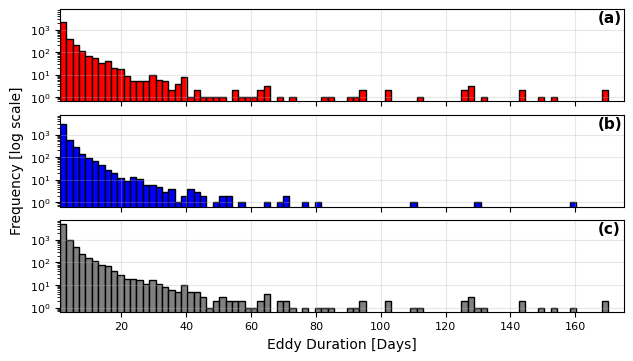

In [97]:
fig, ax = plt.subplots(3,1,sharex=True,sharey=True,
    figsize=(6.2217,3.5), layout='constrained'
)
ax[0].hist(eddy_duration_max,bins=90,range=(1, max(eddy_duration)),log=True,edgecolor='k',color='r')
ax[0].set_xlim(1,175)
ax[0].grid(alpha=0.3)

ax[1].hist(eddy_duration_min,bins=90,range=(1, max(eddy_duration)),log=True,edgecolor='k',color='b')
ax[1].set_xlim(1,175)
ax[1].set_ylabel('Frequency [log scale]')
ax[1].grid(alpha=0.3)

ax[2].hist(eddy_duration,bins=90,range=(1, max(eddy_duration)),log=True,edgecolor='k',color='grey')
ax[2].set_xlim(1,175)
ax[2].set_xlabel('Eddy Duration [Days]')
ax[2].grid(alpha=0.3)

ax[0].annotate('(a)',xy=[167,2000],fontweight='bold')
ax[1].annotate('(b)',xy=[167,2000],fontweight='bold')
ax[2].annotate('(c)',xy=[167,2000],fontweight='bold')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyDurationHist',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [90]:

Days_pos_surf = [[] for i in steps]
for ID,LAT,LON,TIME in zip(locMax_surf['ID'],locMax_surf['Latitude'],locMax_surf['Longitude'],locMax_surf['Time']):
    Days_pos_surf[int(ID)-1].append([LON,LAT,TIME])
for ID,LAT,LON,TIME in zip(locMin_surf['ID'],locMin_surf['Latitude'],locMin_surf['Longitude'],locMin_surf['Time']):
    Days_pos_surf[int(ID)-1].append([LON,LAT,TIME])




ValueError: invalid literal for int() with base 10: "['1']"

/tmp/ipykernel_609809/2790381140.py:33: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for collection in contour.collections:
/tmp/ipykernel_609809/2790381140.py:61: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for collection in contour.collections:
/tmp/ipykernel_609809/2790381140.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(


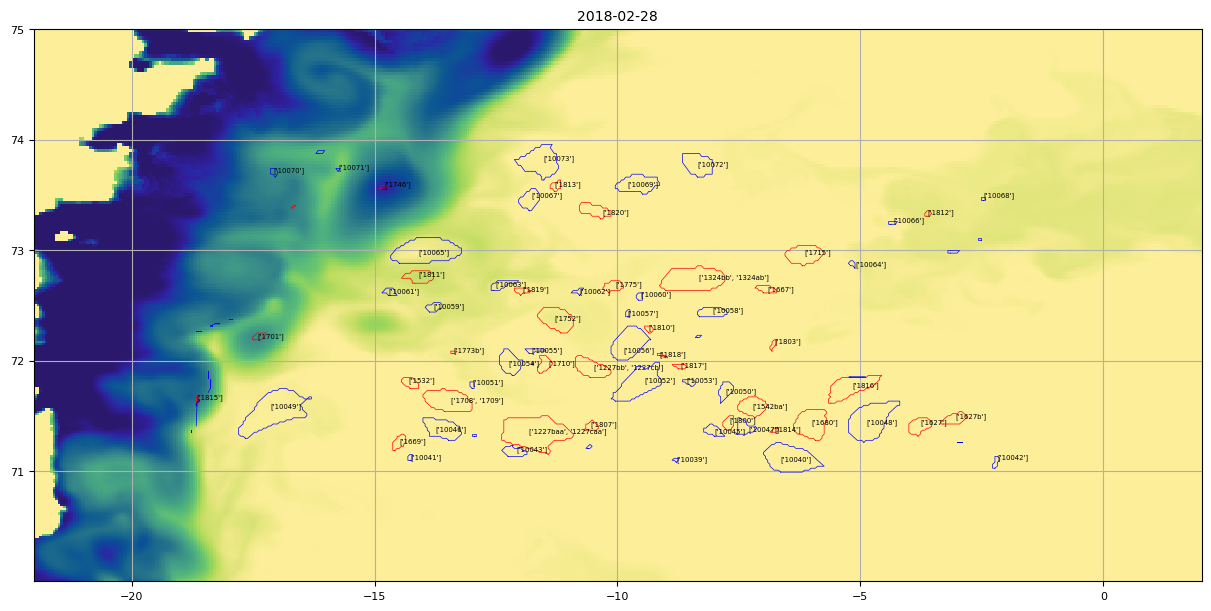

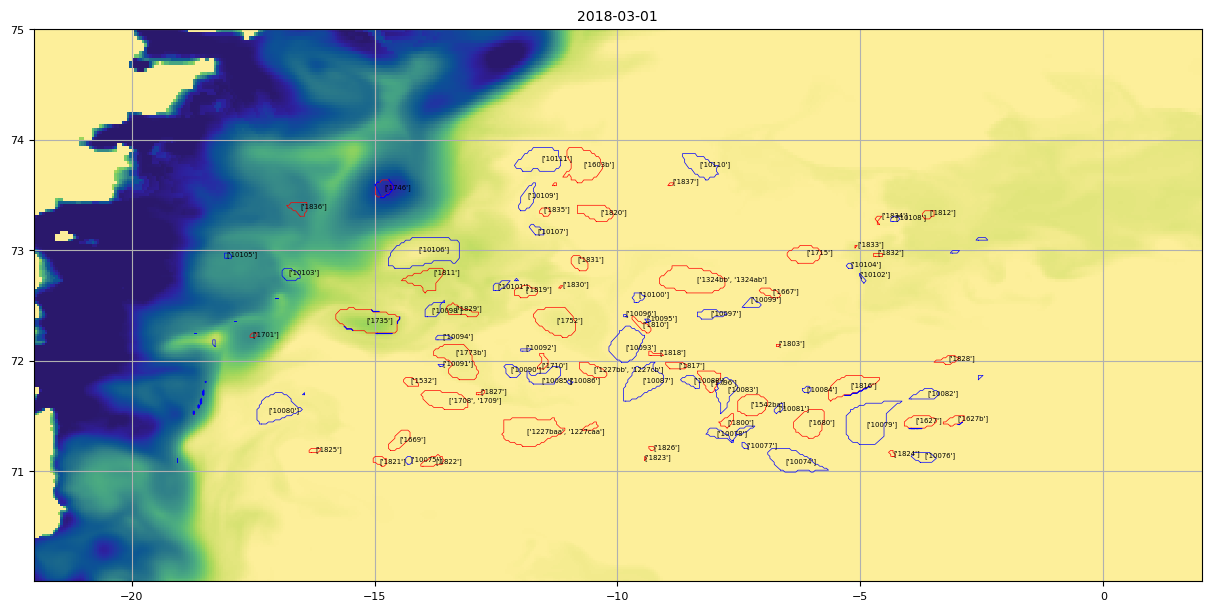

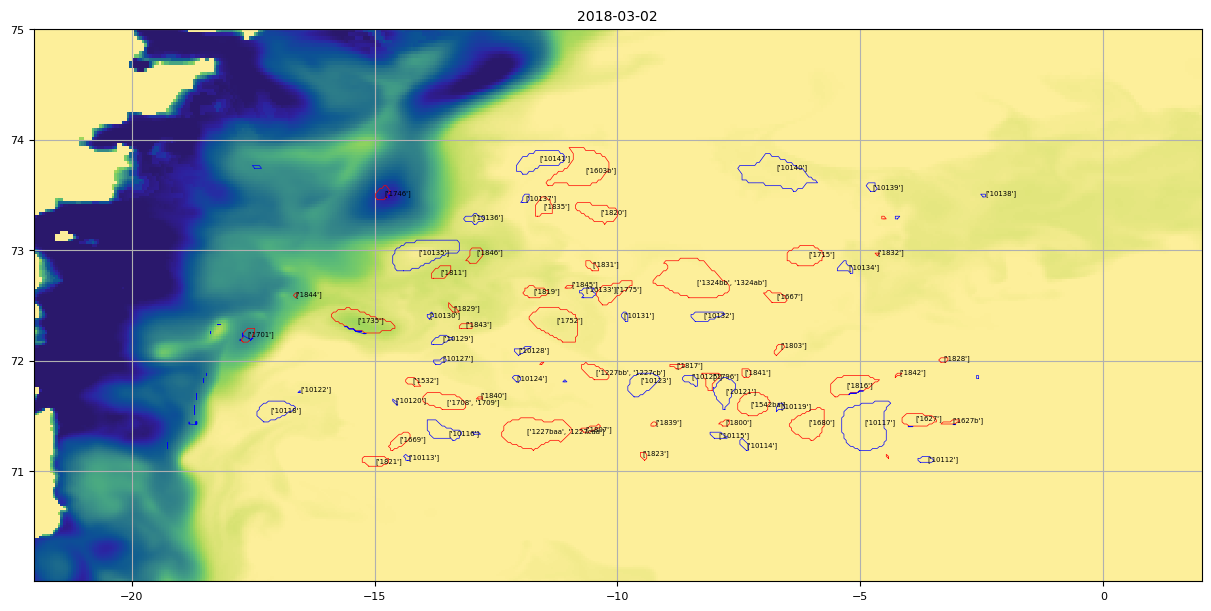

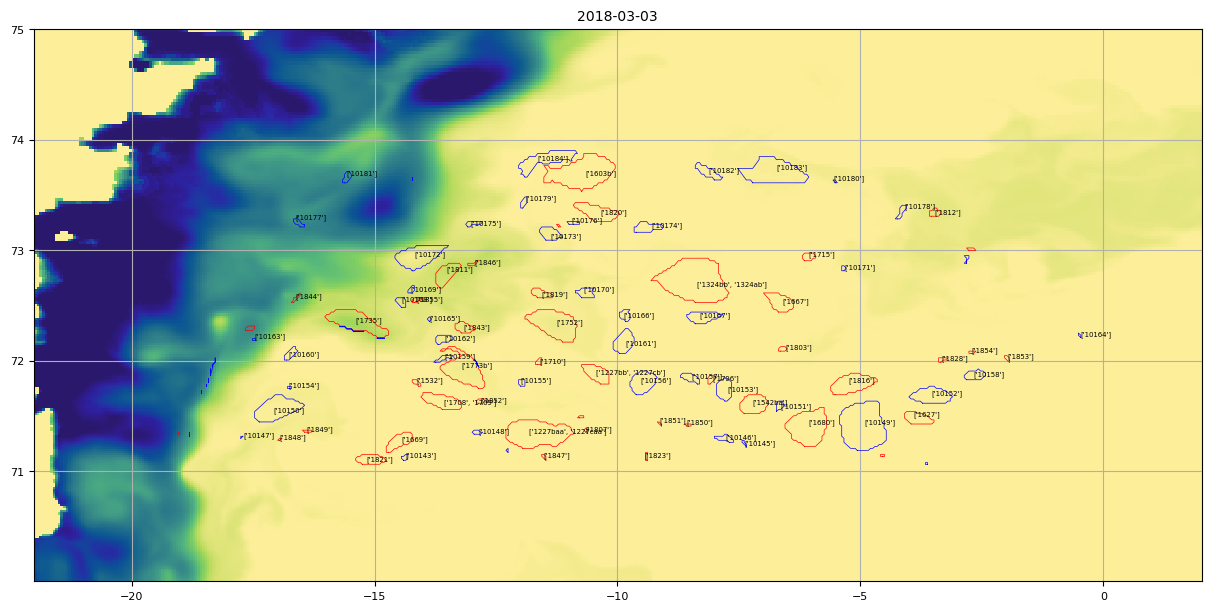

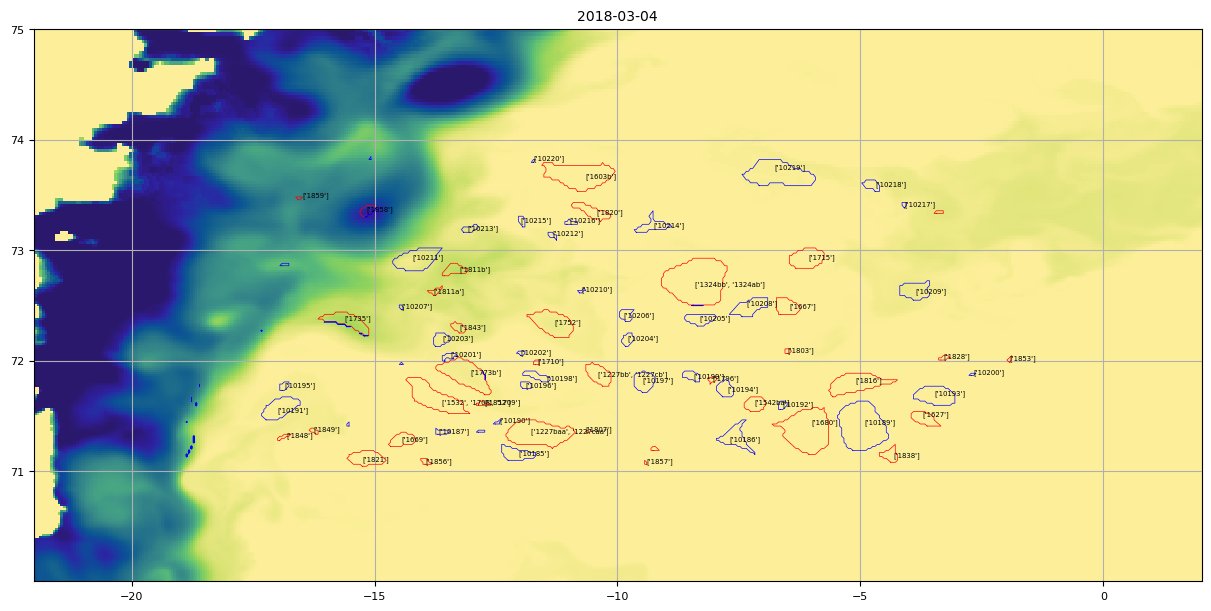

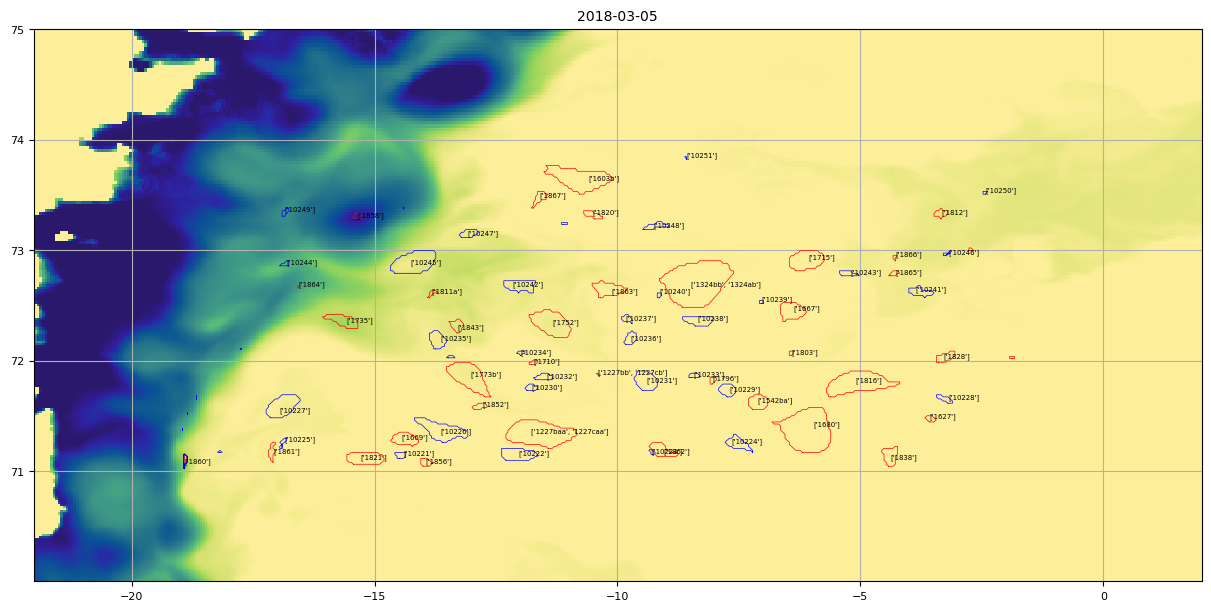

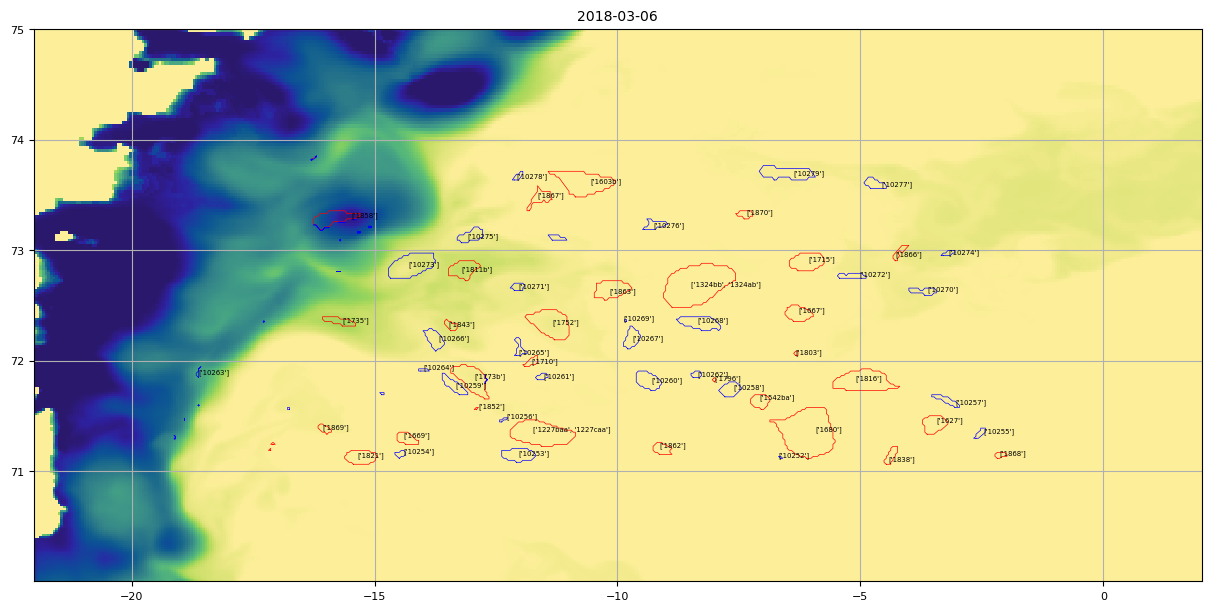

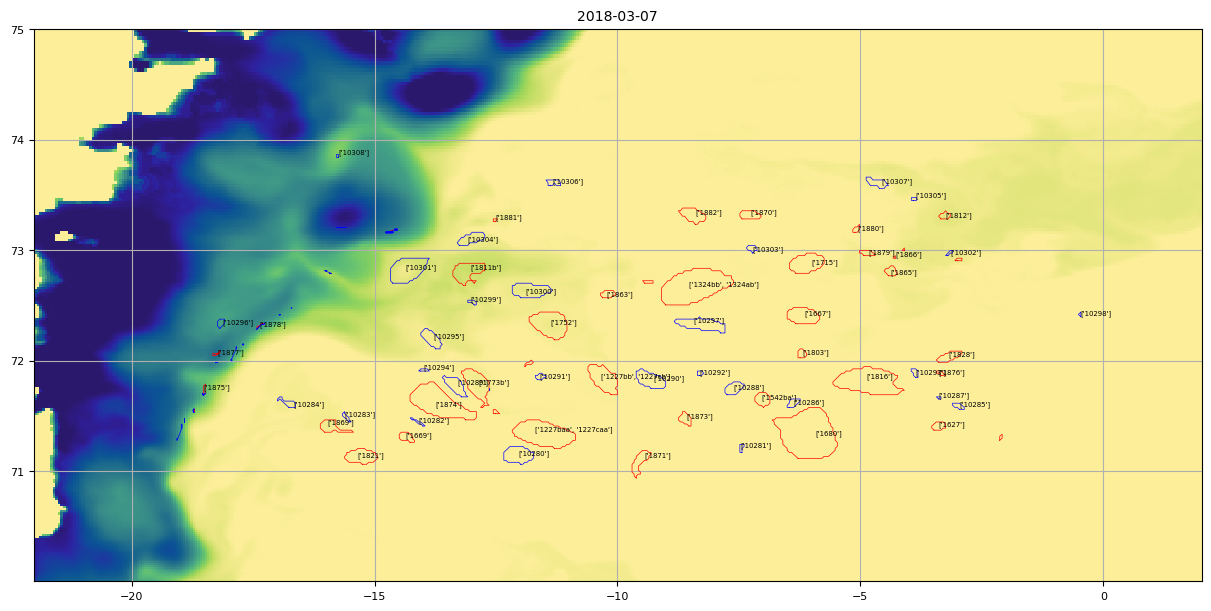

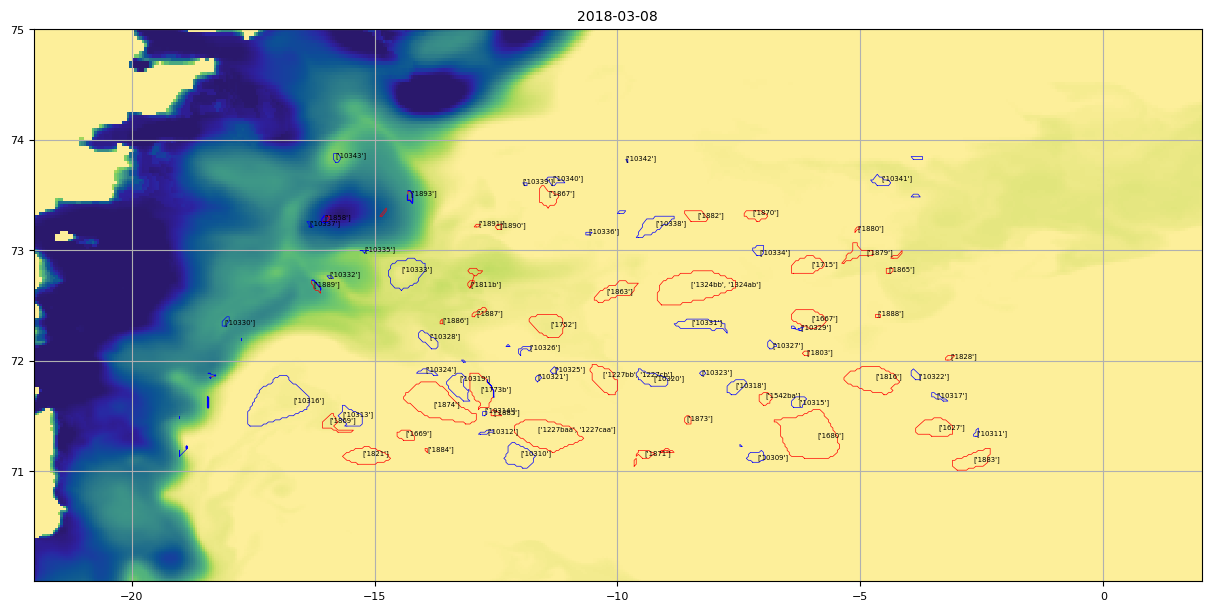

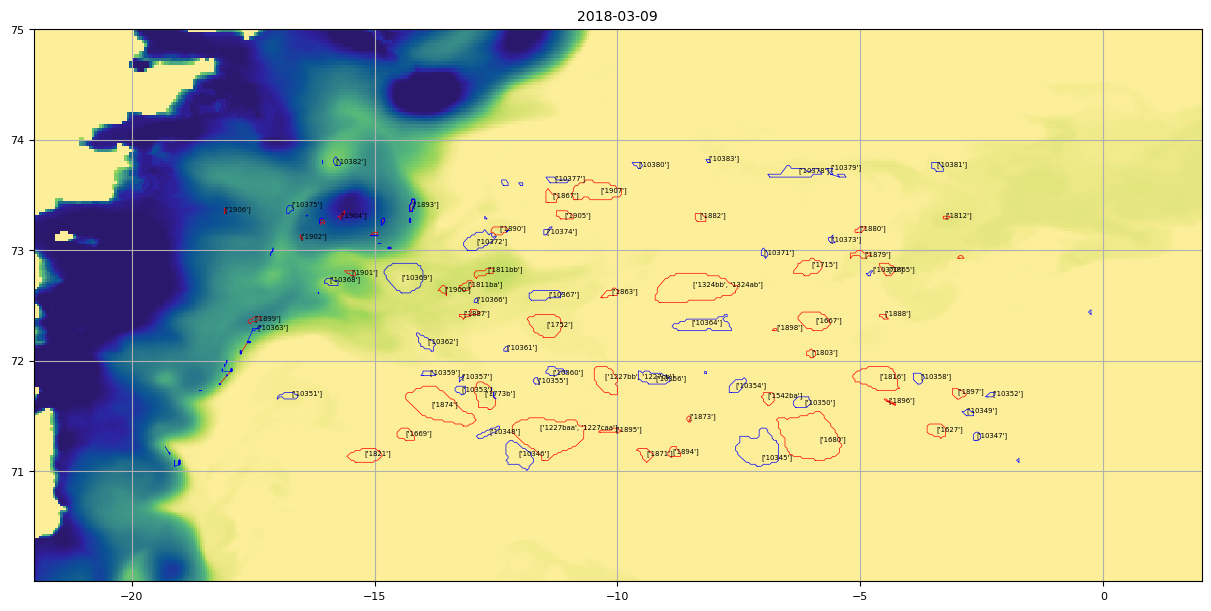

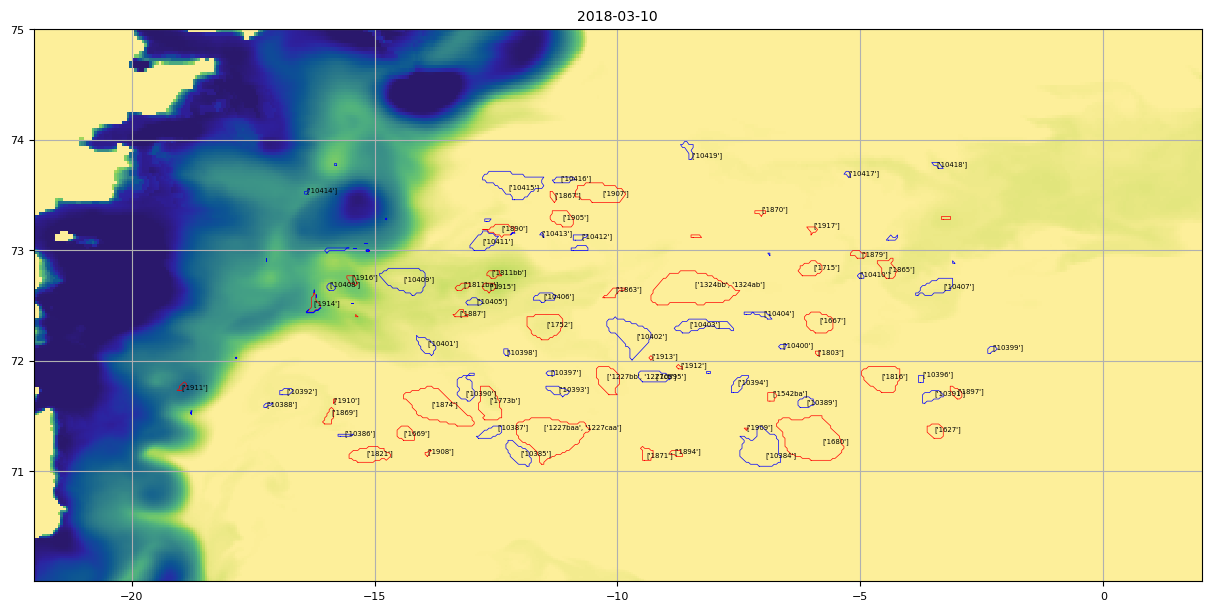

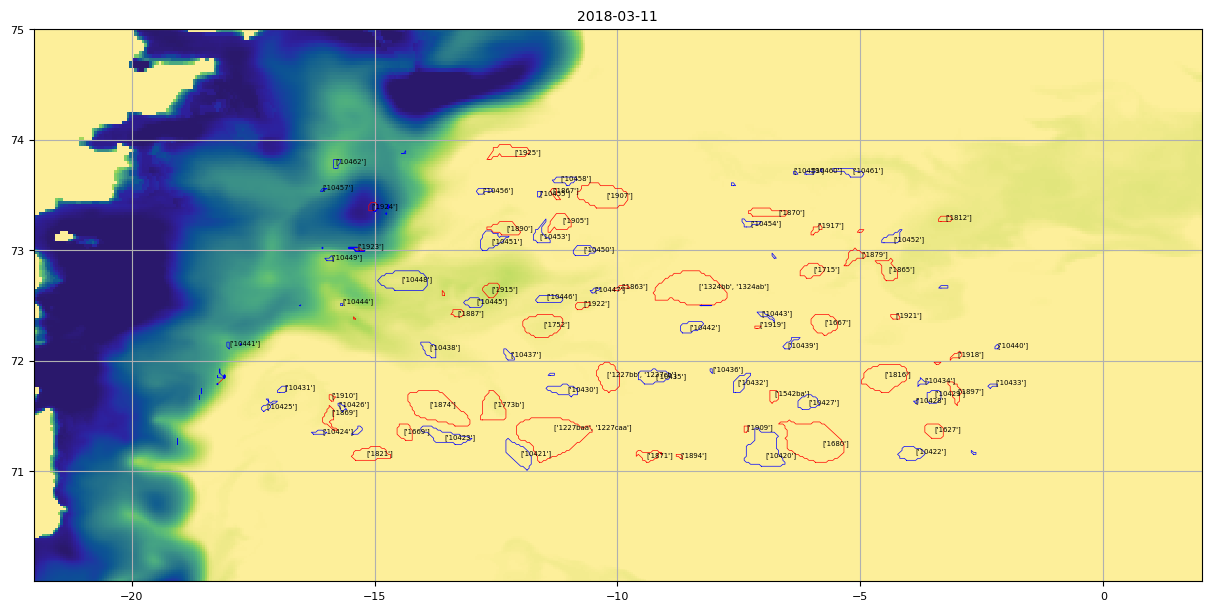

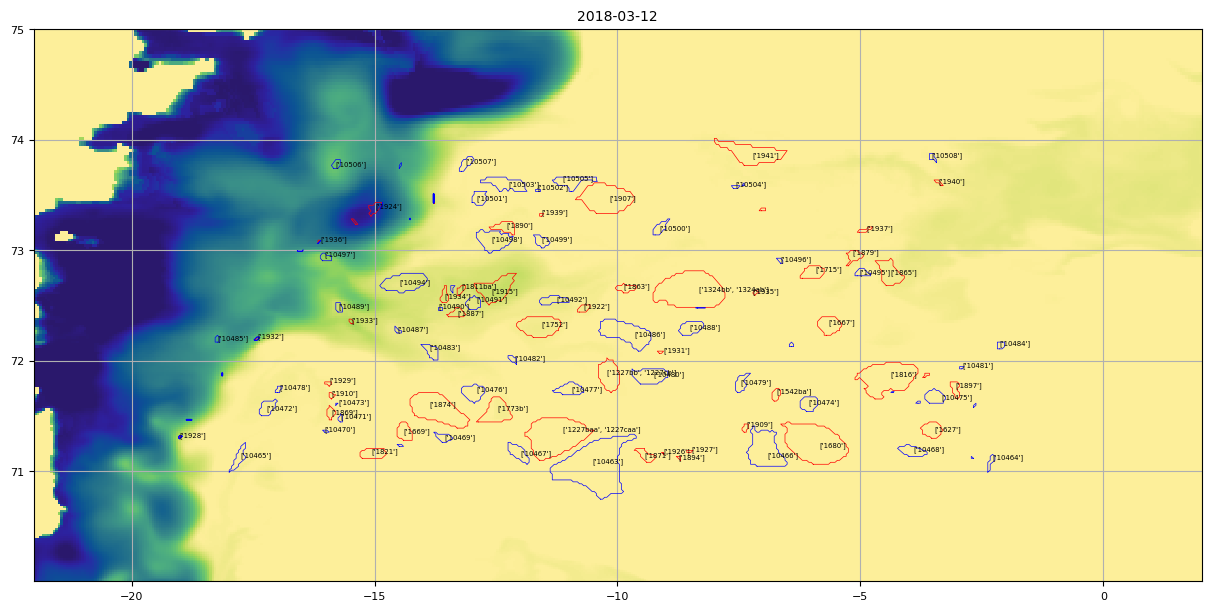

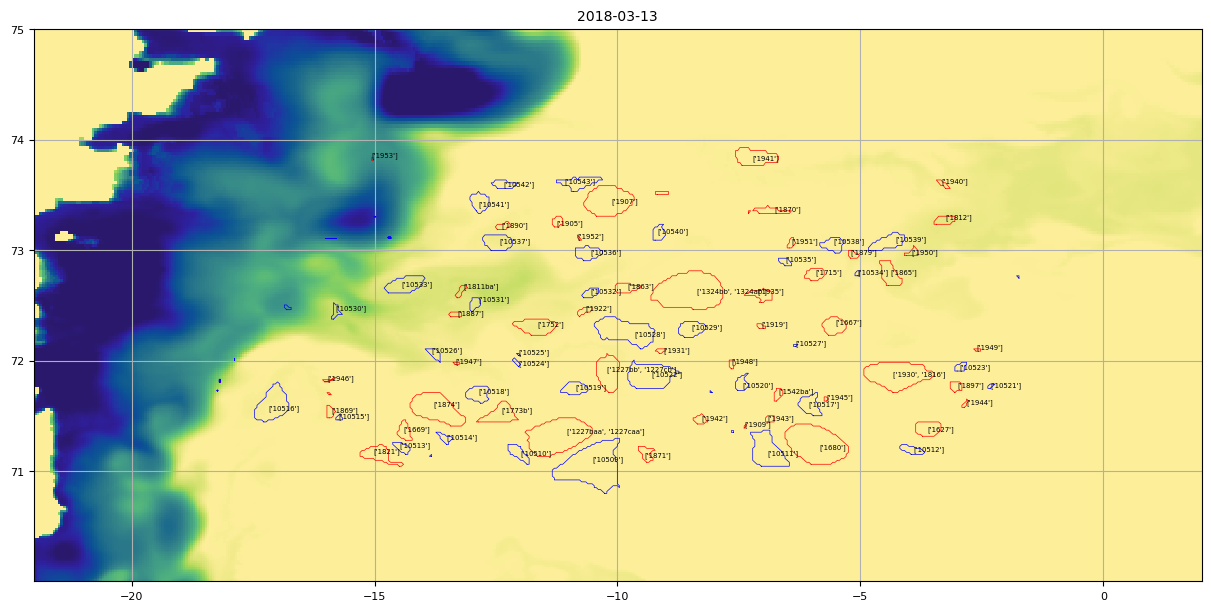

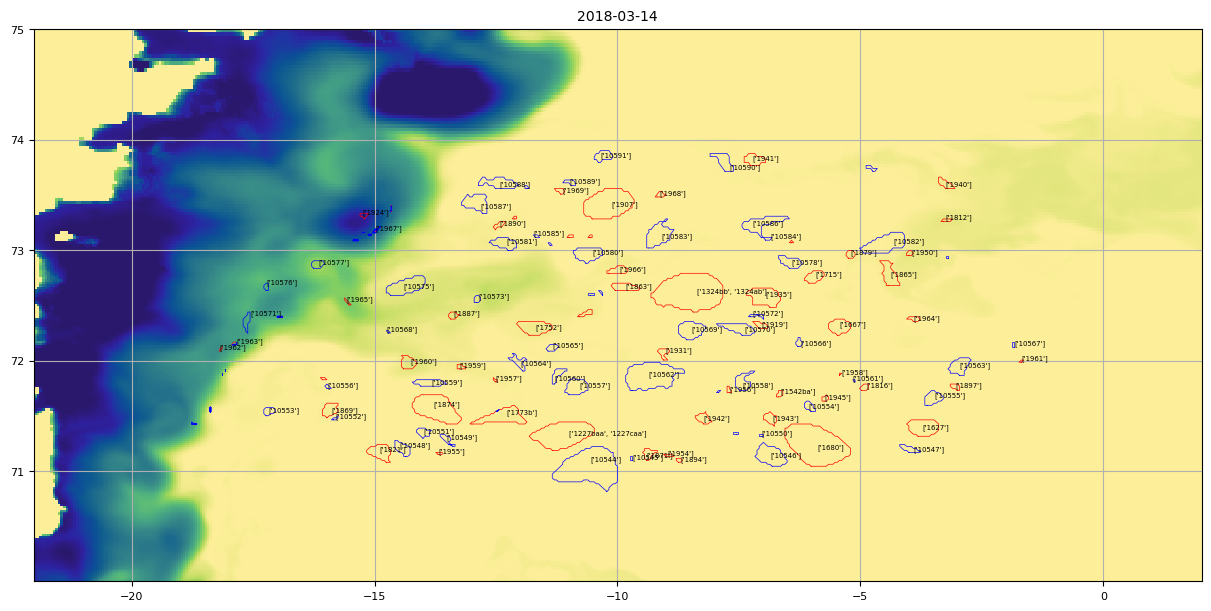

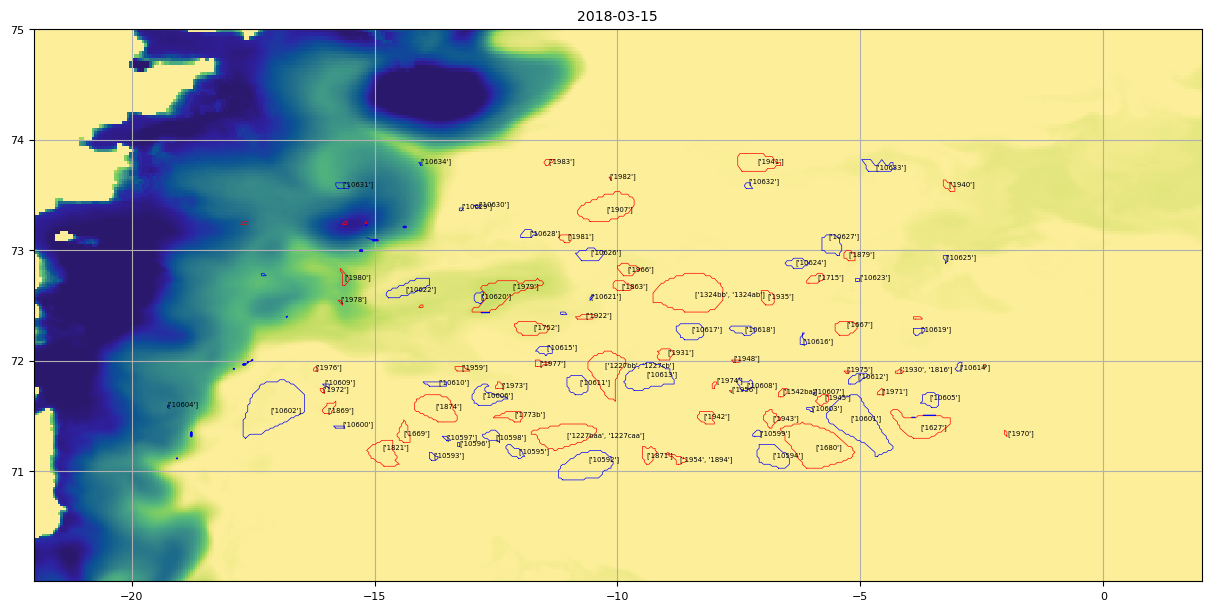

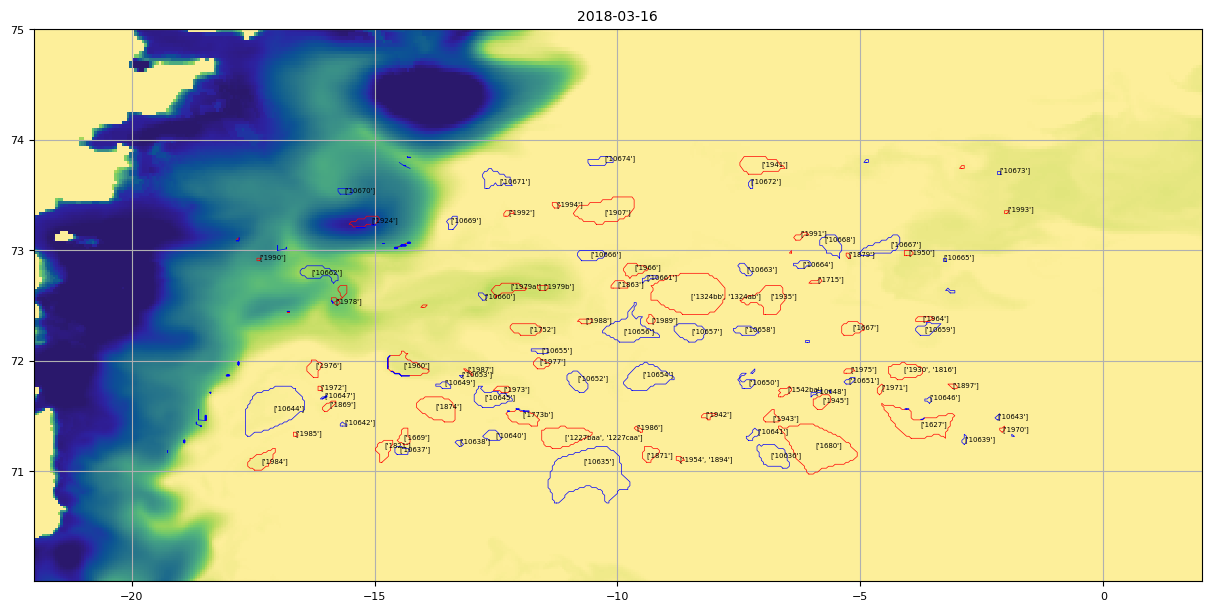

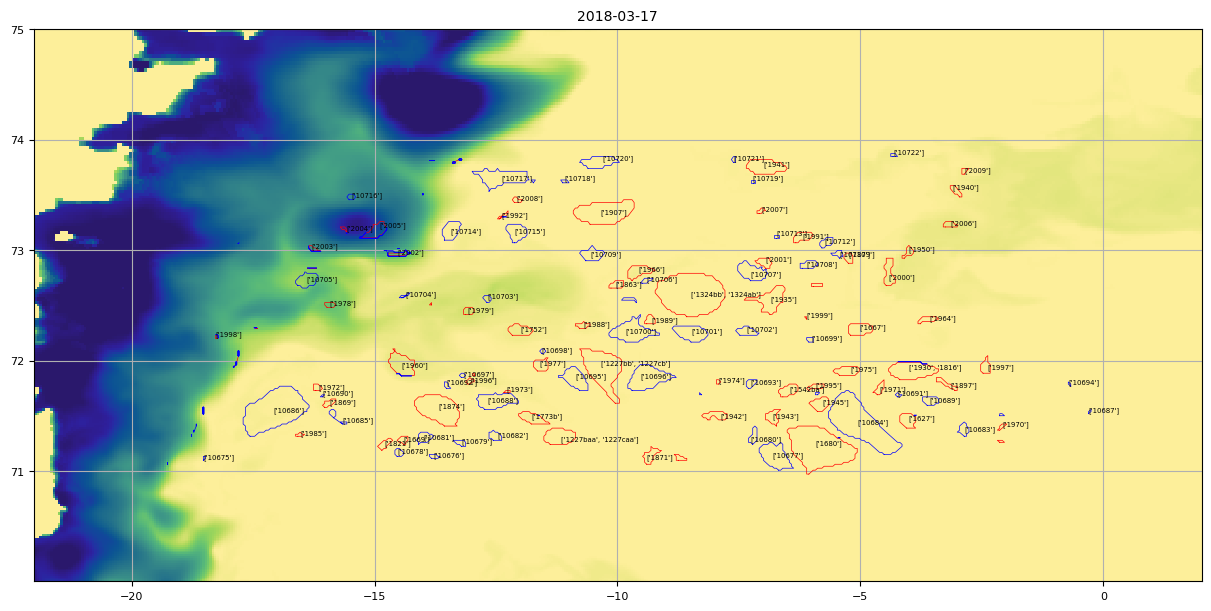

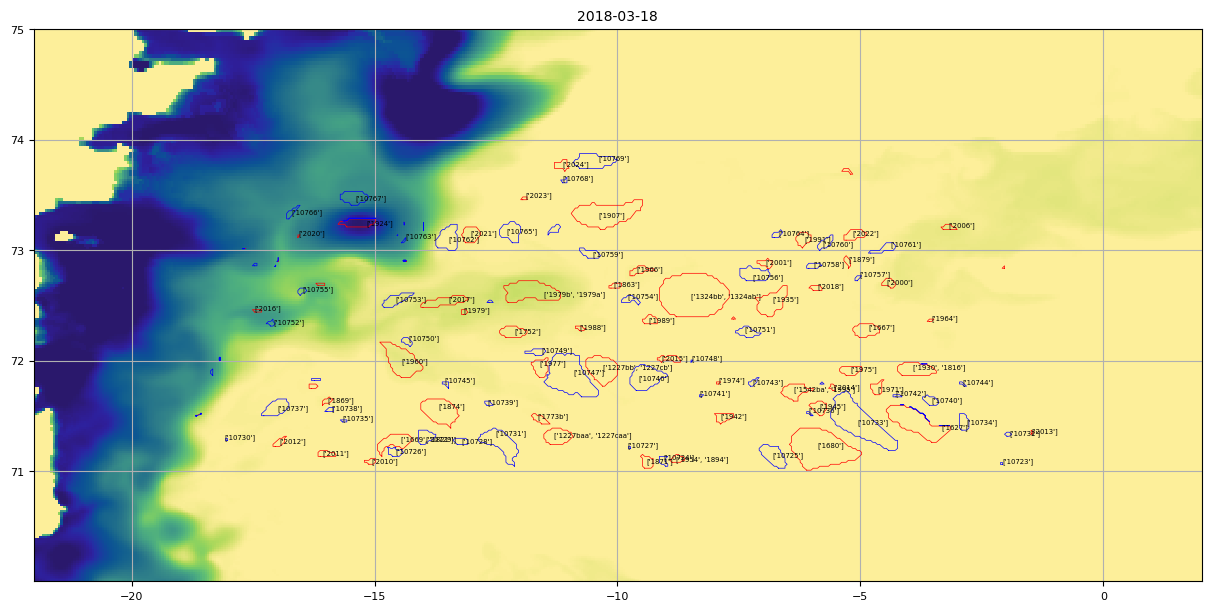

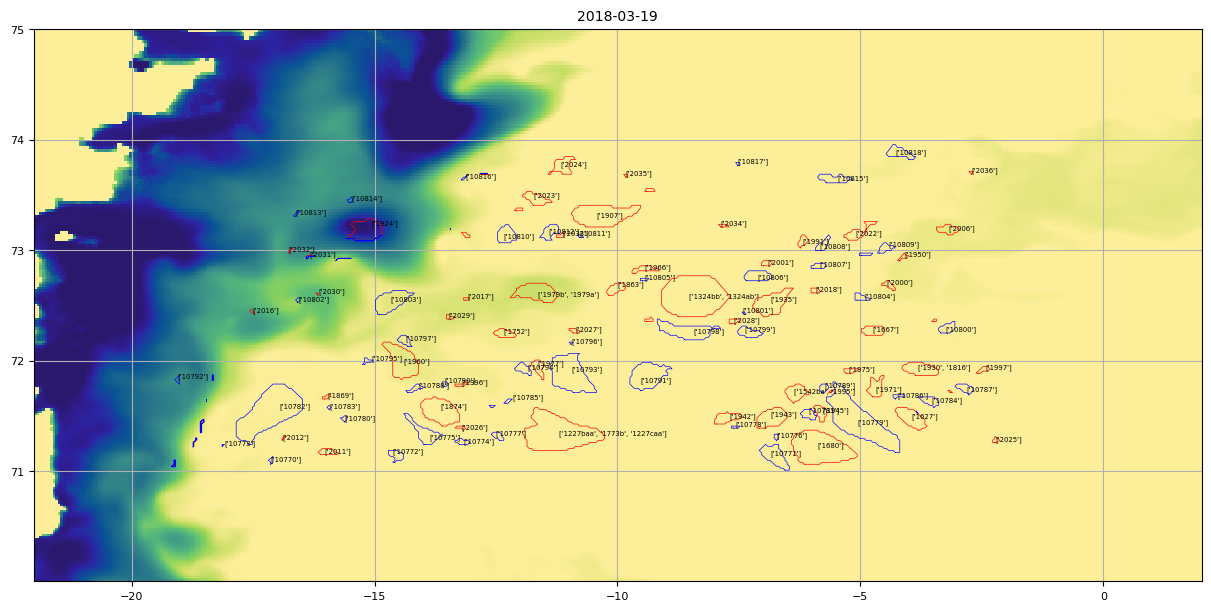

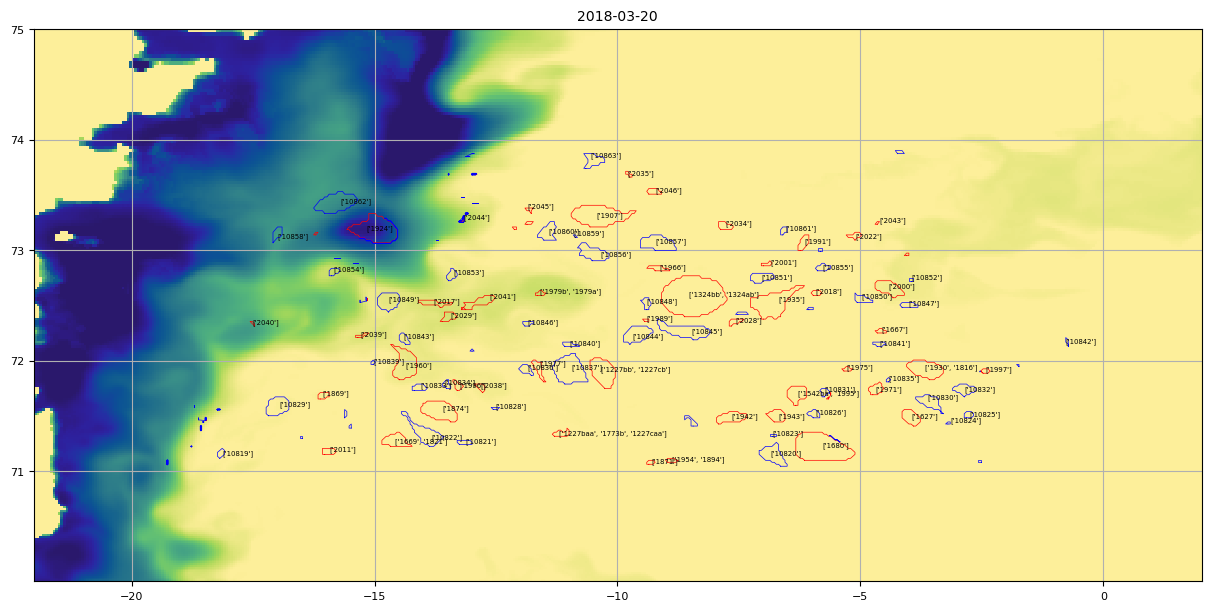

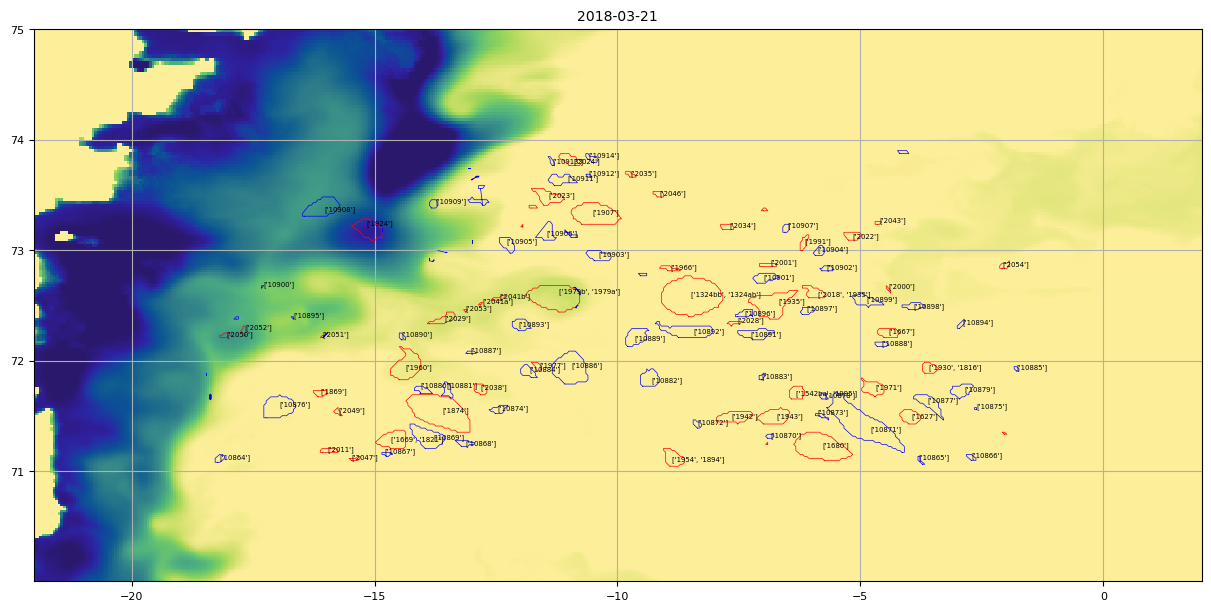

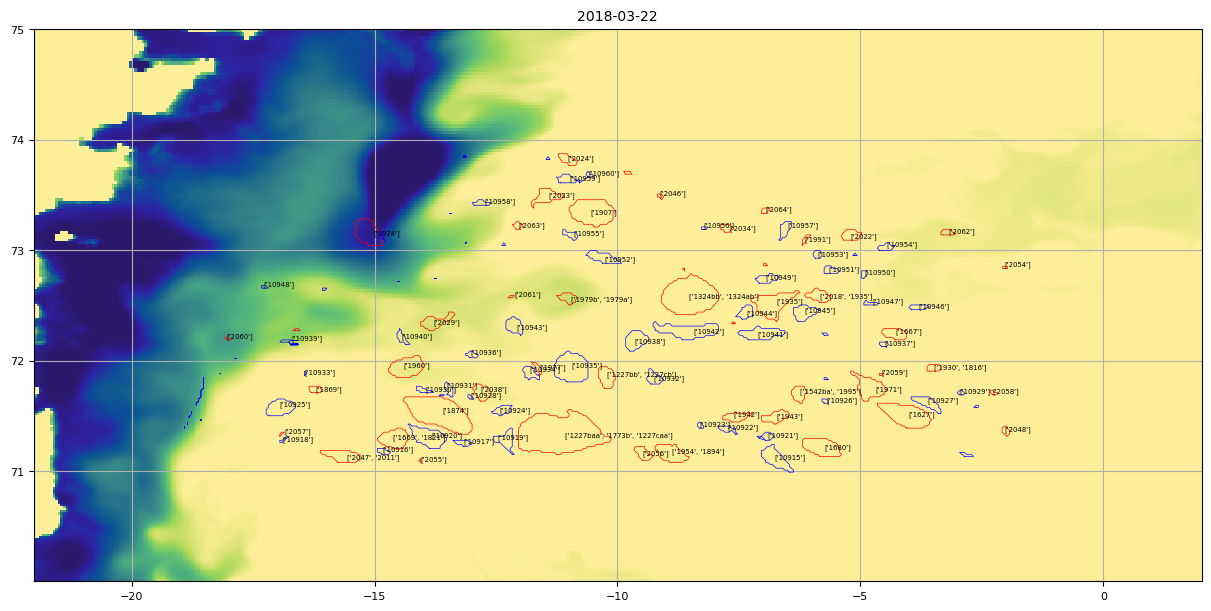

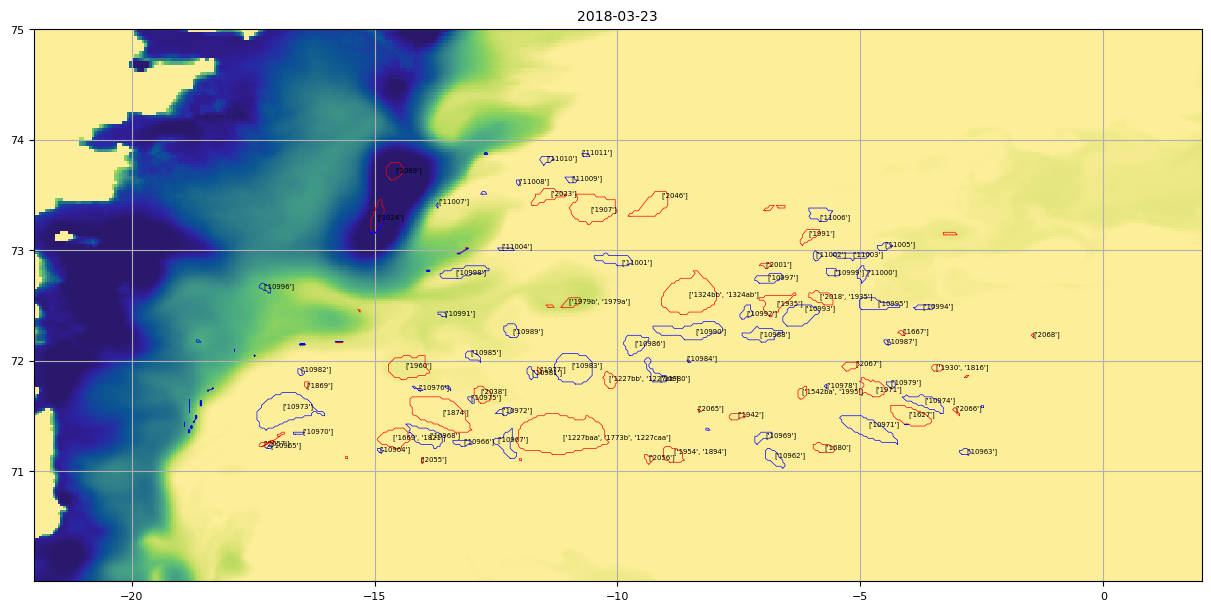

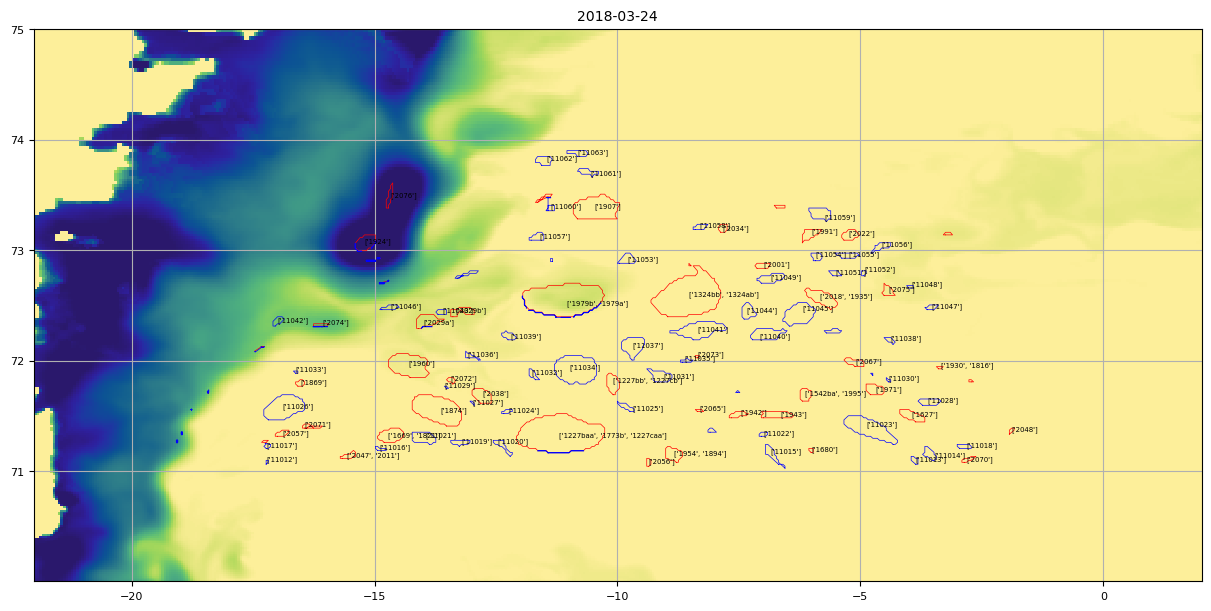

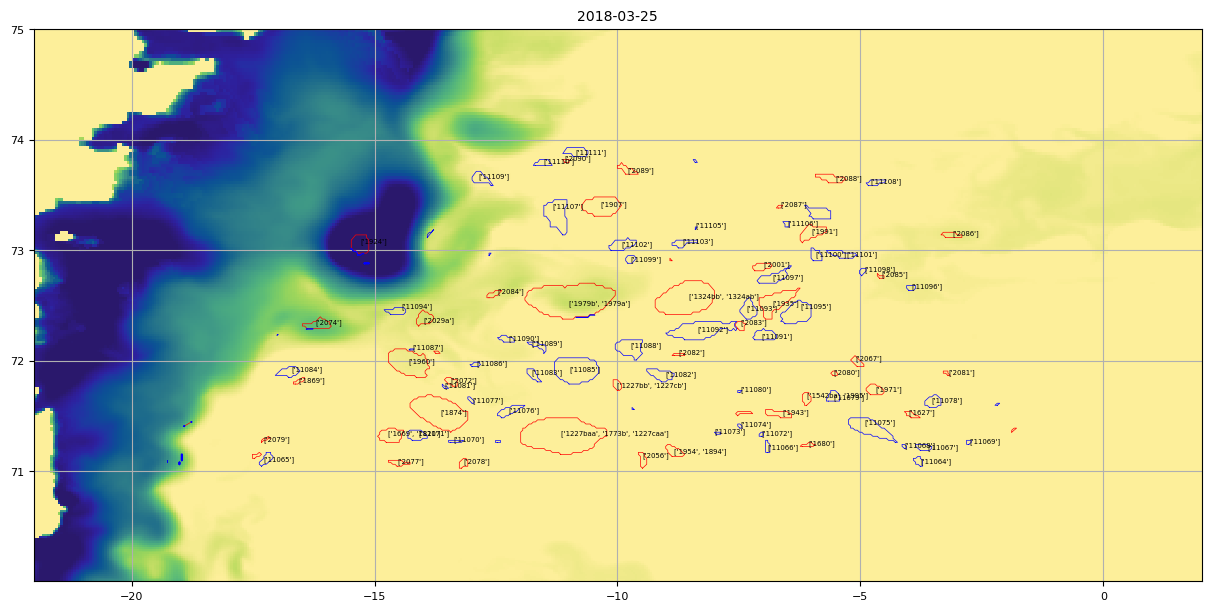

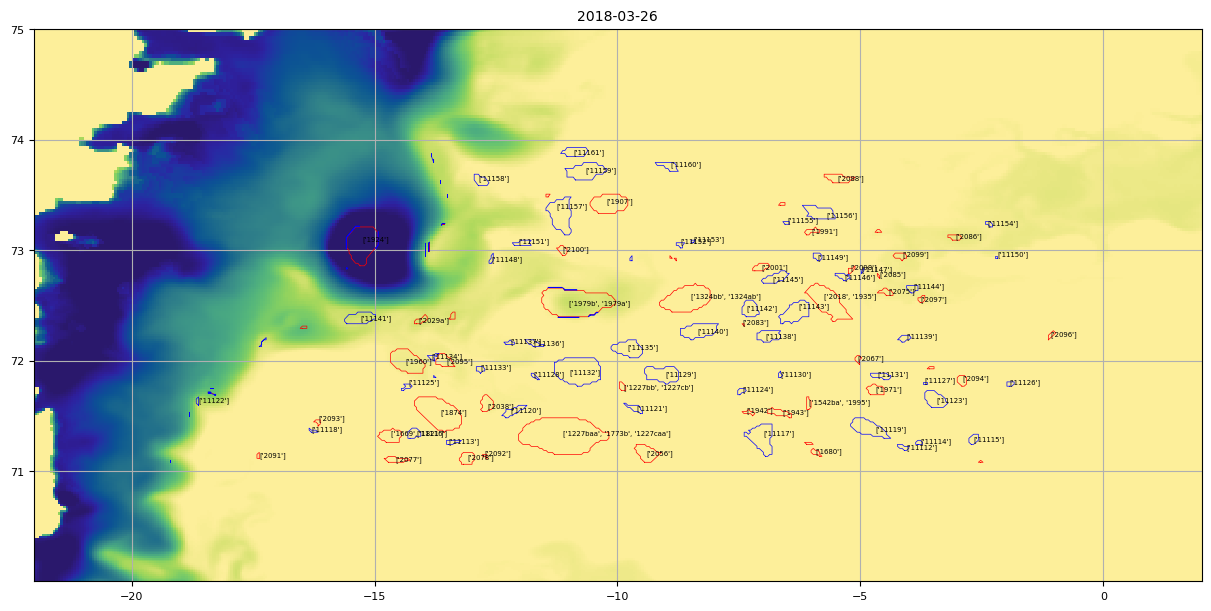

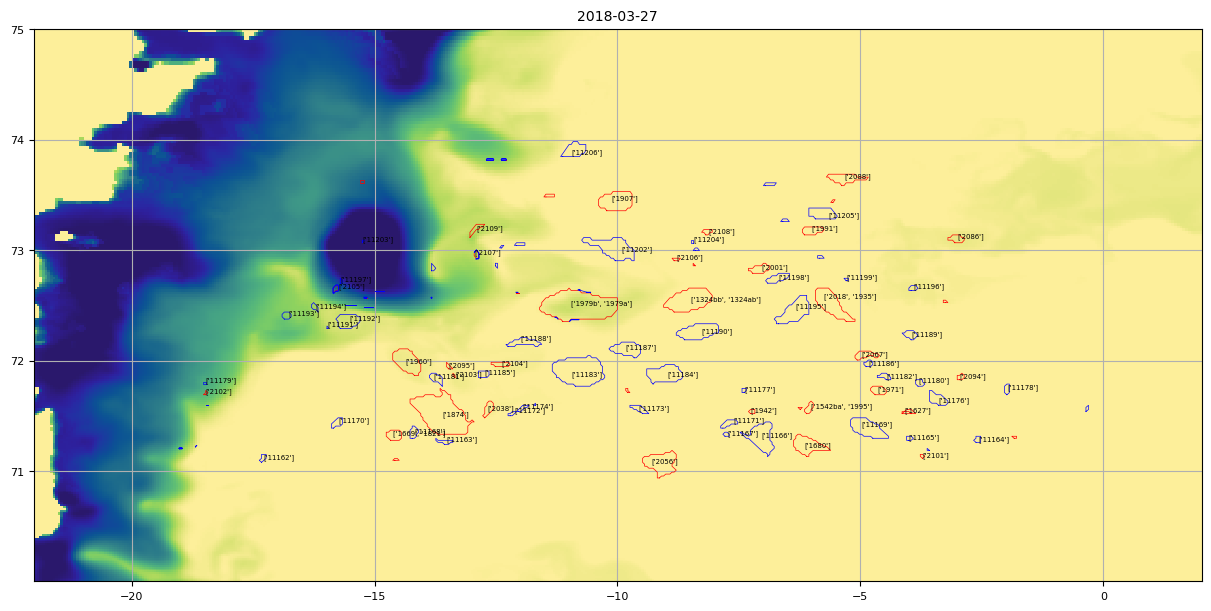

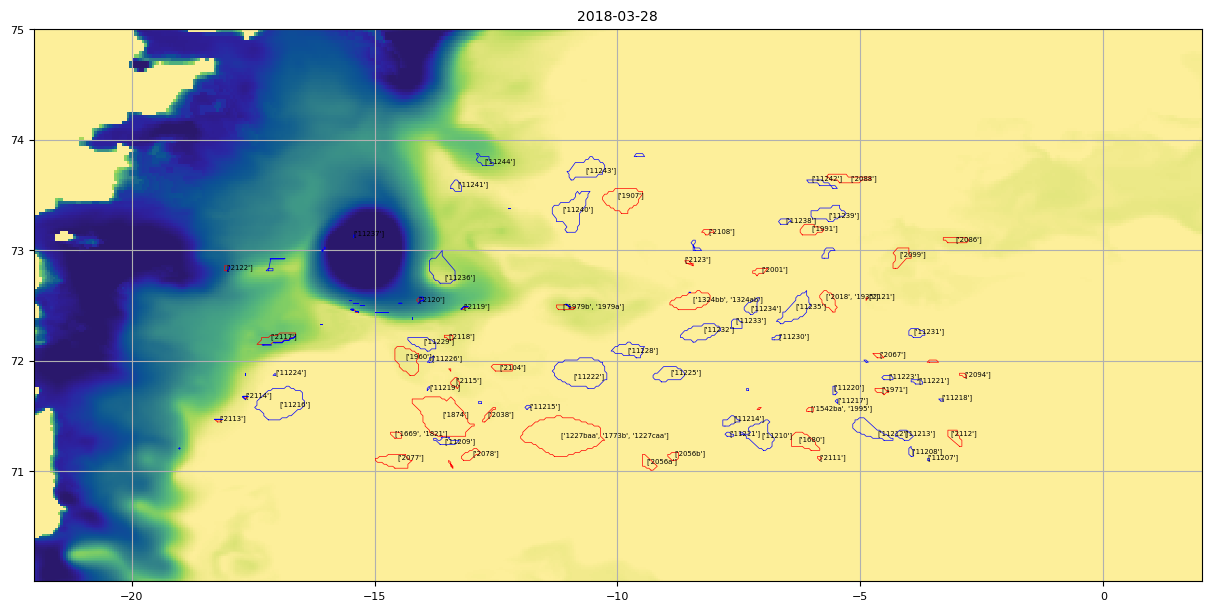

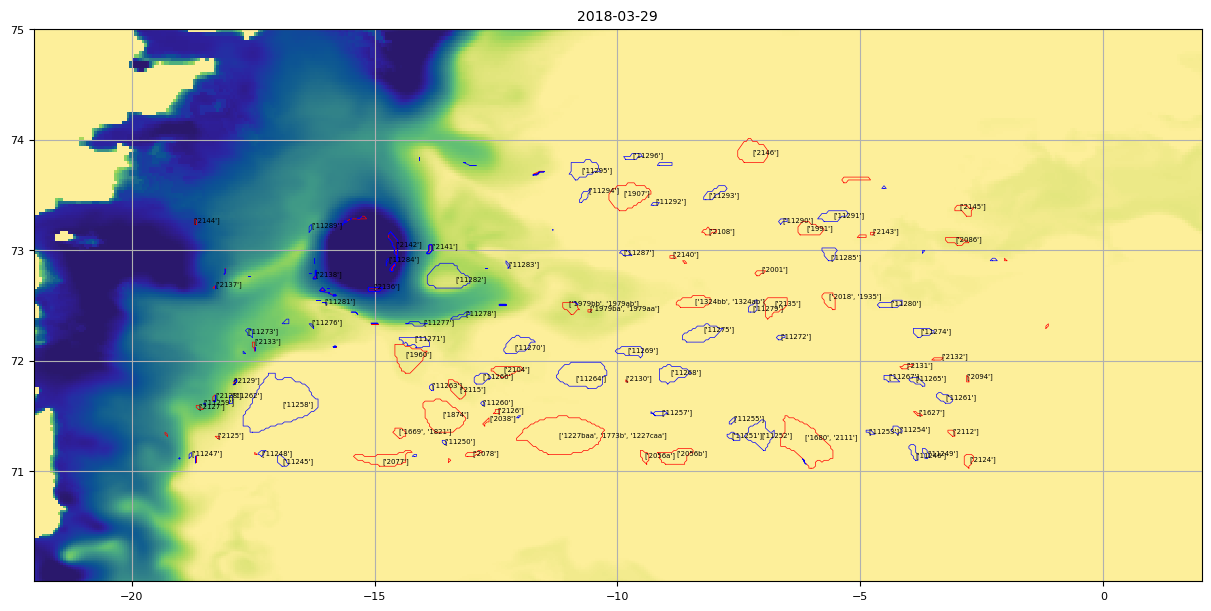

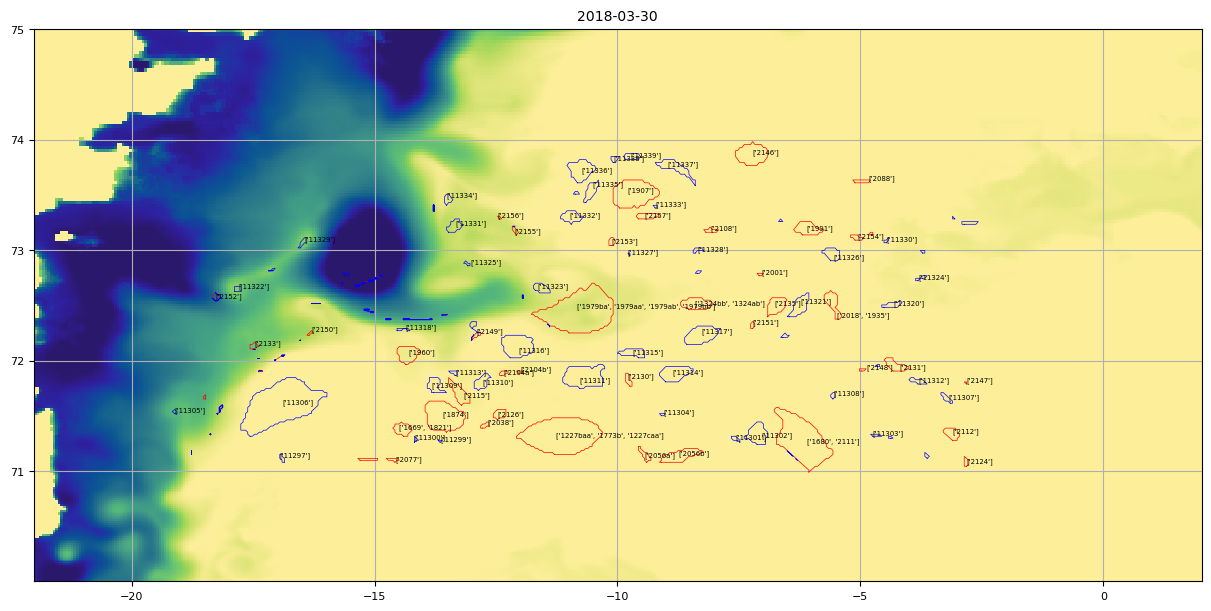

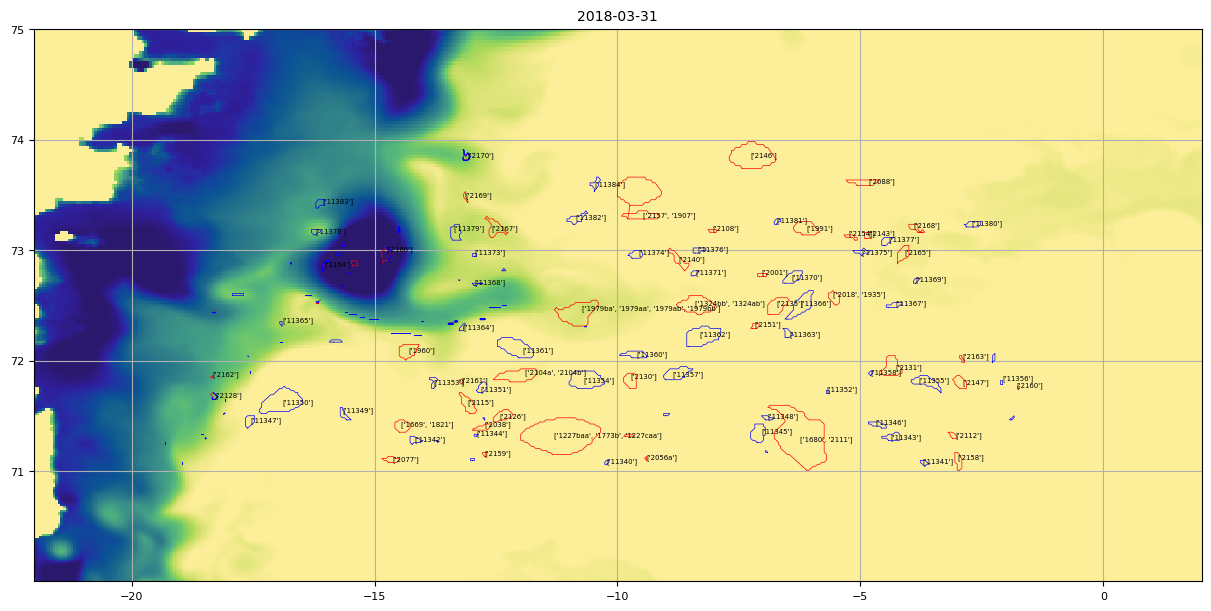

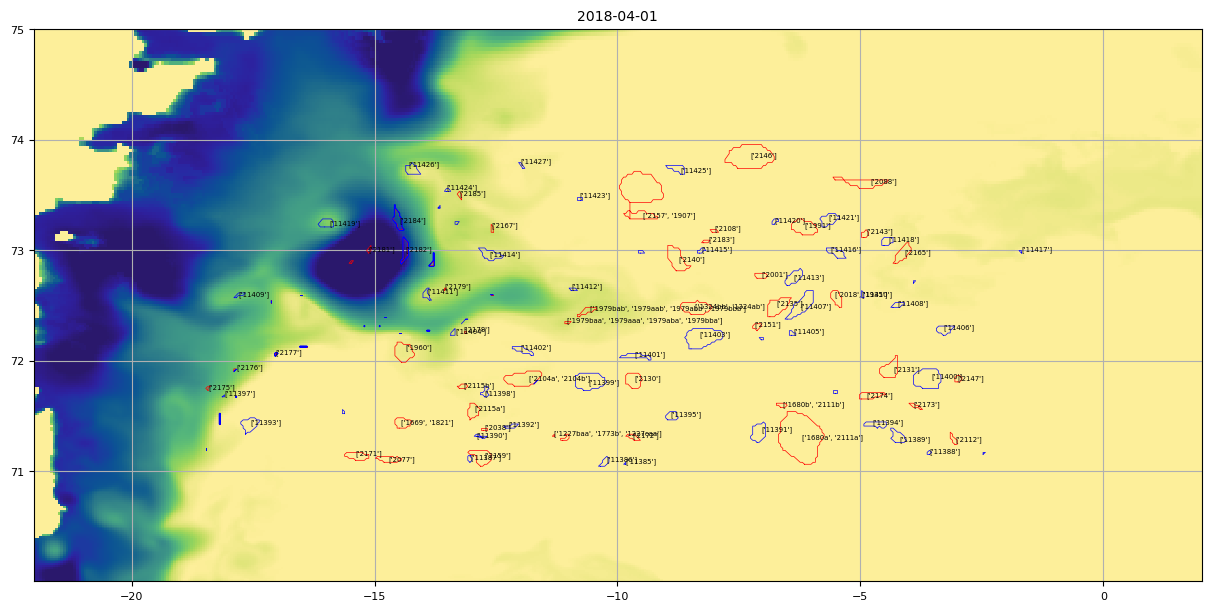

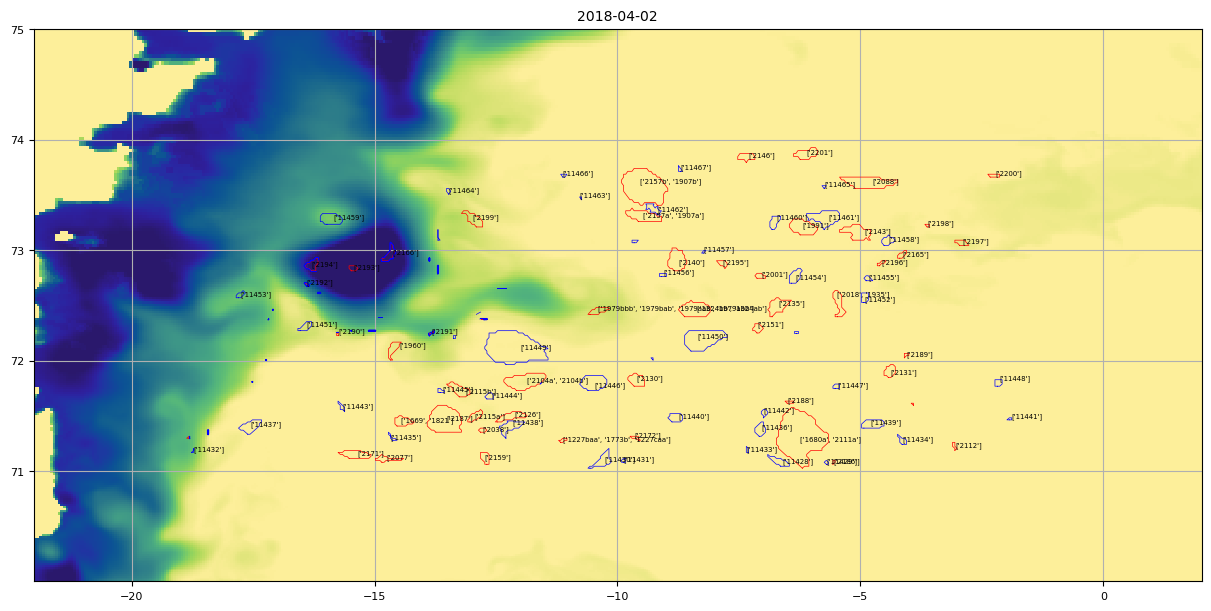

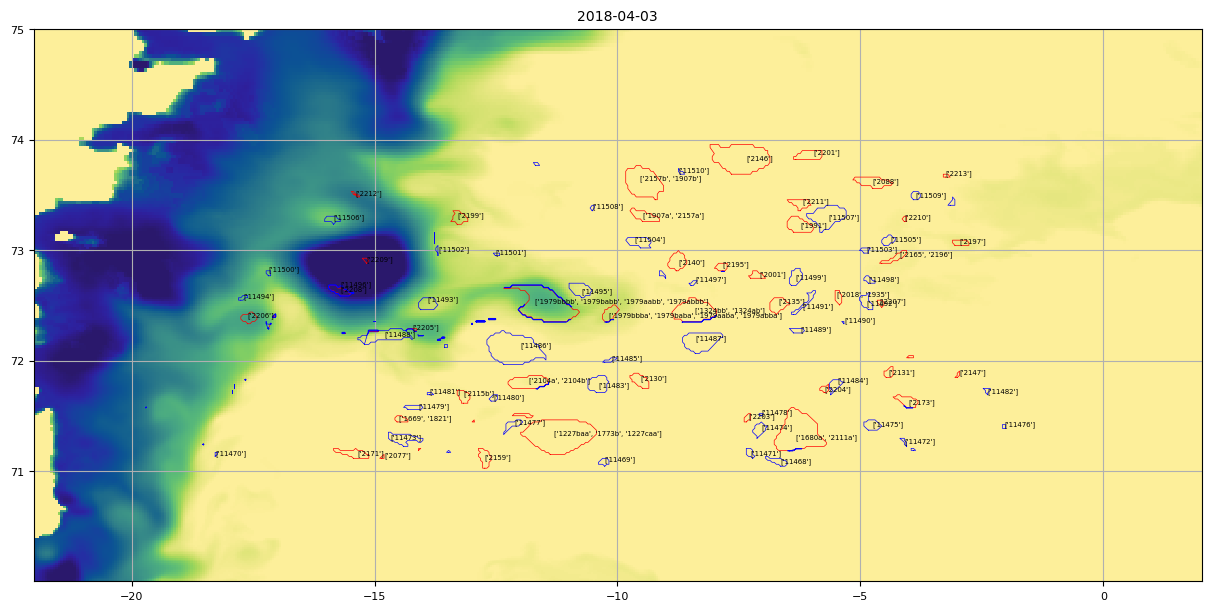

In [10]:
def is_closed_contour(vertices, tol=1e-5):
                distance = np.linalg.norm(vertices[0] - vertices[-1])
                return distance < tol


# Process Contour Paths to Handle Jumps
def process_contour_path(vertices, jump_threshold=0.2):
    segments = []
    current_segment = [vertices[0]]
    
    for i in range(1, len(vertices)):
        if np.linalg.norm(vertices[i] - vertices[i-1]) > jump_threshold:
            segments.append(np.array(current_segment))
            current_segment = [vertices[i]]
        else:
            current_segment.append(vertices[i])
    
    if current_segment:
        segments.append(np.array(current_segment))
    
    return segments


time_ = np.arange(180,215)
for time in time_:
    fig, ax = plt.subplots(
        figsize=(12,6),layout='constrained'
    )
    contour = ax.contourf(dfOWsurf.X,dfOWsurf.Y,dfOWsurf[time],[0,1],colors='white')
    ax.grid()
    all_contour_points = []

    for collection in contour.collections:
        for path in collection.get_paths():
            # Collect the vertices of the path
            vertices = path.vertices
            all_contour_points.append(vertices)

    processed_contour_segments = []
    for vertices in all_contour_points:
        segments = process_contour_path(vertices)
        processed_contour_segments.extend(segments)
    
    for vertices in processed_contour_segments:
        ax.plot(vertices[:, 0], vertices[:, 1], 'r-', linewidth=0.5)


    data_ID = eddies_ID_max_t_surf.at[time,'ID'].values
    data_LON = eddies_ID_max_t_surf.at[time,'Longitude'].values
    data_LAT = eddies_ID_max_t_surf.at[time,'Latitude'].values
    for i in range(len(data_ID)):
        for vertices in processed_contour_segments:
            region = Path(vertices)
            if region.contains_point((data_LON[i],data_LAT[i])):
                ax.annotate(str(data_ID[i]),[data_LON[i],data_LAT[i]],fontsize=5)
    
    contour = ax.contourf(dfOWsurf.X,dfOWsurf.Y,dfOWsurf[time],[1.5,2],colors='white')

    all_contour_points = []

    for collection in contour.collections:
        for path in collection.get_paths():
            # Collect the vertices of the path
            vertices = path.vertices
            all_contour_points.append(vertices)

    processed_contour_segments = []
    for vertices in all_contour_points:
        segments = process_contour_path(vertices)
        processed_contour_segments.extend(segments)
    
    for vertices in processed_contour_segments:
        ax.plot(vertices[:, 0], vertices[:, 1], 'b-', linewidth=0.5)

    data_ID = eddies_ID_min_t_surf.at[time,'ID'].values
    data_LON = eddies_ID_min_t_surf.at[time,'Longitude'].values
    data_LAT = eddies_ID_min_t_surf.at[time,'Latitude'].values
    for i in range(len(data_ID)):
        for vertices in processed_contour_segments:
            region = Path(vertices)
            if region.contains_point((data_LON[i],data_LAT[i])):
                ax.annotate(str(data_ID[i]),[data_LON[i],data_LAT[i]],fontsize=5)
    
    ax.pcolormesh(FWC.X,FWC.Y,FWC[time],cmap=cmo.haline_r,vmin=0,vmax=10)
    ax.set_title(str(FWC.time.values[time])[0:10])

In [111]:
eddy_ID_area = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/EddyAreaID.nc')

In [115]:
np.unique(eddy_ID_area['EddyID'].isel(time=2).values)

array(['0', "['1']", "['11']", "['12']", "['140']", "['141']", "['142']",
       "['143']", "['144']", "['145']", "['146']", "['147']", "['148']",
       "['149']", "['15']", "['150']", "['151']", "['152']", "['153']",
       "['154']", "['155']", "['156']", "['157']", "['158']", "['159']",
       "['16', '13']", "['160']", "['161']", "['162']", "['163']",
       "['164']", "['165']", "['166']", "['167']", "['168']", "['169']",
       "['17']", "['170']", "['171']", "['172']", "['173']", "['18']",
       "['2']", "['22']", "['23']", "['25']", "['26']", "['27']",
       "['29']", "['34']", "['35a']", "['35b']", "['37']", "['4']",
       "['40']", "['43']", "['45']", "['46']", "['49']", "['5']",
       "['50']", "['51']", "['52']", "['56']", "['57']", "['58']",
       "['59']", "['6']", "['9']"], dtype=object)